In [72]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import h5py
import math

In [96]:
path ='/srv/home/chenyu/TensorDenoise/Experiment/'
raw_data = sio.loadmat(path + 'WS2_23x100x22500_realspace.mat')
raw_data = raw_data['datacube']
raw_data[raw_data<0] = 0

denoised_data = sio.loadmat(path + 'WS2_23x100x22500_realspace_10-50-70.mat')
denoised_data = denoised_data['est_HOOI']
denoised_data[denoised_data<0] = 0
print(denoised_data.shape)
print(raw_data.shape)

(22, 98, 22500)
(22, 98, 22500)


In [85]:
raw_ADF = np.zeros((denoised_data.shape[0],denoised_data.shape[1]))
denoised_ADF = np.zeros((denoised_data.shape[0],denoised_data.shape[1]))
for irow in range(denoised_data.shape[0]):
    for icol in range(denoised_data.shape[1]):
        frame = denoised_data[irow,icol].reshape(150,150)
        denoised_ADF[irow,icol] = np.sum(frame * mask)
        frame = raw_data[irow,icol].reshape(150,150)
        raw_ADF[irow,icol] = np.sum(frame * mask)

(-0.5, 97.5, 21.5, -0.5)

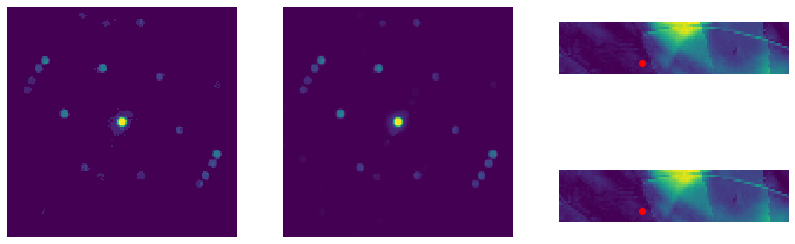

In [101]:
fig = plt.figure(figsize=(14,5))
irow = 17
icol = 35

fig.add_subplot(131)
plt.imshow(raw_data[irow,icol,:].reshape(150,150))
plt.axis('off')

fig.add_subplot(132)
plt.imshow(denoised_data[irow,icol,:].reshape(150,150))
plt.axis('off')

fig.add_subplot(233)
plt.imshow(raw_ADF)
plt.scatter(icol,irow,c='r')
plt.axis('off')

fig.add_subplot(236)
plt.imshow(denoised_ADF)
plt.scatter(icol,irow,c='r')
plt.axis('off')

Text(0.5, 0, 'Components')

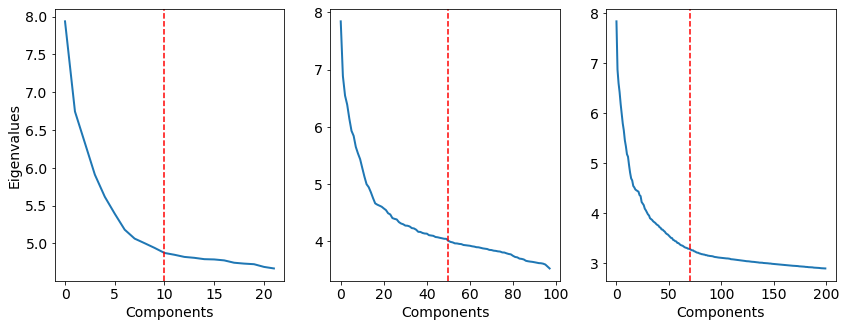

In [7]:
# Analysis eigenvalues
temp = sio.loadmat('/srv/home/chenyu/TensorDenoise/Experiment/WS2_23x100x22500_realspace_eigenvalues.mat')

fig = plt.figure(figsize=(14,5))

fig.add_subplot(131)
e1 = temp['e1']
plt.plot(np.log(e1[::-1]),linewidth='2')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.axvline(x=10,color='r',ls='--')
plt.ylabel('Eigenvalues',fontsize=14)
plt.xlabel('Components',fontsize=14)

fig.add_subplot(132)
e2 = temp['e2']
plt.plot(np.log(e2[::-1]),linewidth='2')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.axvline(x=50,color='r',ls='--')
# plt.ylabel('Eigenvalues',fontsize=14)
plt.xlabel('Components',fontsize=14)

fig.add_subplot(133)
e3 = temp['e3']
e3 = e3[::-1]
plt.plot(np.log(e3[:200]),linewidth='2')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.axvline(x=70,color='r',ls='--')
# plt.ylabel('Eigenvalues',fontsize=14)
plt.xlabel('Components',fontsize=14)


In [102]:
path ='/srv/home/chenyu/TensorDenoise/Experiment/'
raw_data = sio.loadmat(path + 'WS2_23x100x22500_realspace.mat')
raw_data = raw_data['datacube']
raw_data[raw_data<0] = 0

denoised_data = sio.loadmat(path + 'WS2_23x100x22500_recspace_35-35-70.mat')
denoised_data = denoised_data['est_HOOI']
denoised_data[denoised_data<0] = 0
print(denoised_data.shape)
print(raw_data.shape)

(150, 150, 2156)
(22, 98, 22500)


In [103]:
raw_ADF = np.zeros((raw_data.shape[0],raw_data.shape[1]))
denoised_ADF = np.zeros((raw_data.shape[0],raw_data.shape[1]))
for irow in range(raw_data.shape[0]):
    for icol in range(raw_data.shape[1]):
        frame = np.transpose(denoised_data[:,:,icol*22+irow])
        denoised_ADF[irow,icol] = np.sum(frame * mask)
        frame = raw_data[irow,icol].reshape(150,150)
        raw_ADF[irow,icol] = np.sum(frame * mask)

(-0.5, 97.5, 21.5, -0.5)

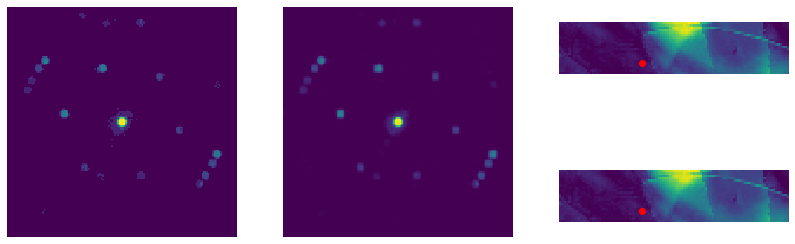

In [105]:
fig = plt.figure(figsize=(14,5))
irow = 17
icol = 35

fig.add_subplot(131)
plt.imshow(raw_data[irow,icol,:].reshape(150,150))
plt.axis('off')

fig.add_subplot(132)
plt.imshow(np.transpose(denoised_data[:,:,icol*22+irow]))
plt.axis('off')

temp = np.sum(np.sum(denoised_data,axis=0),axis=0)

fig.add_subplot(233)
plt.imshow(raw_ADF)
plt.scatter(icol,irow,c='r')
plt.axis('off')

fig.add_subplot(236)
plt.imshow(denoised_ADF)
plt.scatter(icol,irow,c='r')
plt.axis('off')

Text(0.5, 0, 'Components')

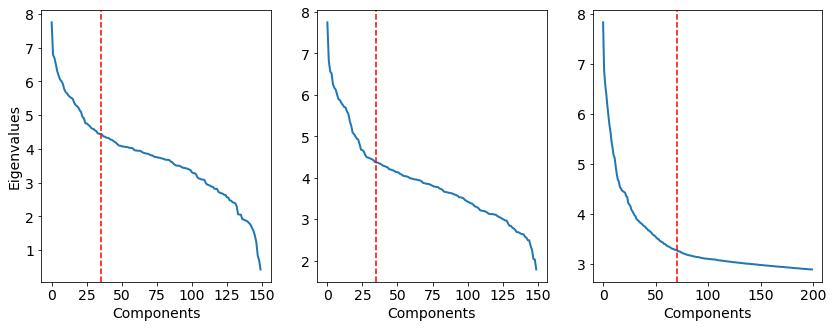

In [46]:
# Analysis eigenvalues
temp = sio.loadmat('/srv/home/chenyu/TensorDenoise/Experiment/WS2_23x100x22500_recspace_eigenvalues.mat')

fig = plt.figure(figsize=(14,5))

fig.add_subplot(131)
e1 = temp['e1']
plt.plot(np.log(e1[::-1]),linewidth='2')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.axvline(x=35,color='r',ls='--')
plt.ylabel('Eigenvalues',fontsize=14)
plt.xlabel('Components',fontsize=14)

fig.add_subplot(132)
e2 = temp['e2']
plt.plot(np.log(e2[::-1]),linewidth='2')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.axvline(x=35,color='r',ls='--')
# plt.ylabel('Eigenvalues',fontsize=14)
plt.xlabel('Components',fontsize=14)

fig.add_subplot(133)
e3 = temp['e3']
e3 = e3[::-1]
plt.plot(np.log(e3[:200]),linewidth='2')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.axvline(x=70,color='r',ls='--')
# plt.ylabel('Eigenvalues',fontsize=14)
plt.xlabel('Components',fontsize=14)


In [56]:
def create_circular_mask(h, w, center=None, radius=None):

    if center is None: # use the middle of the image
        center = [int(w/2), int(h/2)]
    if radius is None: # use the smallest distance between the center and image walls
        radius = min(center[0], center[1], w-center[0], h-center[1])

    Y, X = np.ogrid[:h, :w]
    dist_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2)

    mask = dist_from_center <= radius
    return mask

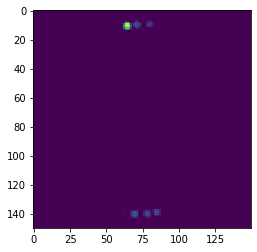

In [80]:
# Build mask to exclude beam stopper and symmetric to registered diffraction center
# center calculated as COM registered blank scan
center_x = 75
center_y = 75
# outer radius determined by maximum possible radius on the image
outer_radius = 70

# manually determined inner radius to remove beam stopper
inner_radius = 62

# generate map based on angle to center point to remove beam stopper arm
angle_top = 70
angle_bottom = 70

kx = 150
ky = 150
kx = np.linspace(0,kx-1,kx)
ky = np.linspace(0,ky-1,ky)
weights_x, weights_y = np.meshgrid(kx,ky)
weights_x = weights_x - center_x
weights_y = weights_y - center_y
rho, phi = cart2pol(weights_x, weights_y)

rho[rho > outer_radius] = 0
rho[rho < inner_radius] = 0
rho[rho!=0] = 1

phi[phi>math.pi - math.radians(angle_bottom)] = 0
phi[phi<-math.pi + math.radians(angle_top)] = 0
phi[(phi<math.radians(angle_top)) & (phi>math.radians(-angle_bottom))] = 0
# phi[abs(phi) > math.pi/2] = 0 # only use half of the frame if necessary
phi[phi!=0] = 1

mask = rho*phi

plt.imshow(mask* np.transpose(denoised_data[:,:,irow*98+icol]))
# plt.imshow(mask)

In [70]:
def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return(rho, phi)